# lets try clustering

In [40]:
import numpy as np

import plotly.graph_objects as go

In [59]:
# some vectors for testing
vector1 = np.array([3,4])
zero = np.zeros(2)

vectors = np. array([[[1,2],[1,2],[1,2],[1,2],[1,2]], [[1,2],[1,2],[1,2],[1,2],[1,2]]])

In [37]:
def norm2 (a): return np.sqrt((a ** 2).sum())



In [26]:
def cluster_distance(points, clusterA, clusterB, norm):
    d = float("inf")
    for i in clusterA:
        for j in clusterB:
            dist = norm(points[i] - points[j])
            if dist < d:
                d = dist
    return d

In [30]:
def clustering(array, numOfClusters, norm):
    clusters = [{idx} for idx in range(len(array))]

    while len(clusters) > numOfClusters:
        closestpair = None
        mindist = float("inf")

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = cluster_distance(array, clusters[i], clusters[j], norm)
                if dist < mindist:
                    mindist = dist
                    closestpair = (i, j)

        i, j = closestpair
        merged = clusters[i] | clusters[j]

        clusters = [c for idx, c in enumerate(clusters) if idx not in (i, j)]
        clusters.append(merged)

    return clusters

In [28]:
np.random.seed(0)

# 3 blobs of synthetic data
A = np.random.randn(40, 2) * 0.3 + np.array([0, 0])
B = np.random.randn(40, 2) * 0.3 + np.array([3, 0])
C = np.random.randn(40, 2) * 0.3 + np.array([1.5, 2])

points = np.vstack([A, B, C])

In [38]:
clusters = clustering(points, 3, norm2)
print("Clusters:", clusters)

# Assign colors per cluster
labels = np.zeros(len(points))
for cluster_id, cluster in enumerate(clusters):
    for idx in cluster:
        labels[idx] = cluster_id

Clusters: [{40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79}, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39}, {80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119}]


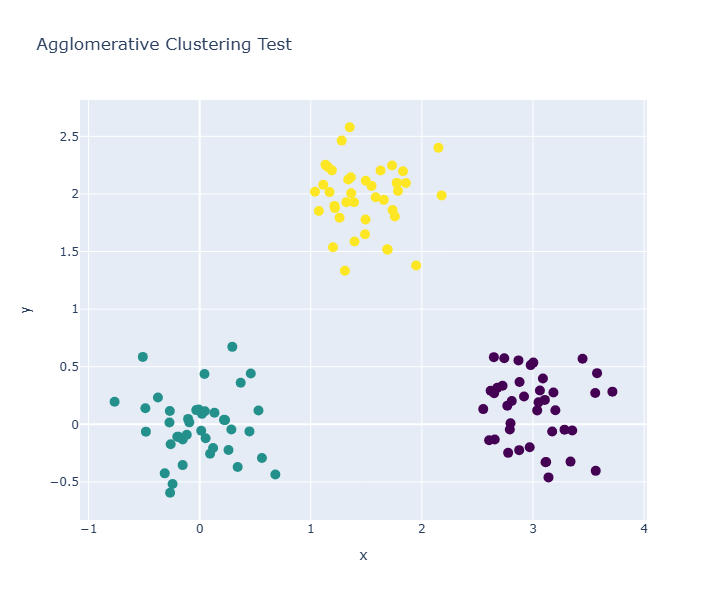

In [41]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=points[:,0],
        y=points[:,1],
        mode="markers",
        marker=dict(
            size=10,
            color=labels,   # cluster colors
            colorscale="Viridis"
        )
    )
)

fig.update_layout(
    title="Agglomerative Clustering Test",
    xaxis_title="x",
    yaxis_title="y",
    width=700,
    height=600
)

fig.show()

In [42]:
# semantic axes:
#[math, coding, art, fantasy, gaming, hobby]
tag_vectors = {
    # ----- Math / Logic -----
    "math":            np.array([1.00, 0.00, 0.00, 0.00, 0.00, 0.00]),
    "NLA":  np.array([0.90, 0.10, 0.00, 0.00, 0.00, 0.00]),
    "calculus":        np.array([0.85, 0.00, 0.00, 0.00, 0.00, 0.00]),
    "analysis":        np.array([0.80, 0.00, 0.00, 0.00, 0.00, 0.00]),

    # ----- Programming / Tech -----
    "coding":          np.array([0.00, 1.00, 0.00, 0.00, 0.00, 0.00]),
    "python":          np.array([0.00, 0.90, 0.00, 0.00, 0.00, 0.00]),
    "cpp":             np.array([0.00, 0.80, 0.00, 0.00, 0.00, 0.00]),
    "algorithms":      np.array([0.10, 0.85, 0.00, 0.00, 0.00, 0.00]),
    "project":         np.array([0.00, 0.70, 0.00, 0.00, 0.00, 0.30]),  # mixed tech + hobby

    # ----- Art / Creativity -----
    "art":             np.array([0.00, 0.00, 1.00, 0.00, 0.00, 0.00]),
    "design":          np.array([0.00, 0.00, 0.85, 0.00, 0.00, 0.00]),
    "drawing":         np.array([0.00, 0.00, 0.90, 0.00, 0.00, 0.30]),

    # ----- Fiction / Fantasy -----
    "fantasy":         np.array([0.00, 0.00, 0.00, 1.00, 0.00, 0.00]),
    "worldbuilding":   np.array([0.00, 0.00, 0.00, 0.90, 0.00, 0.30]),
    "lore":            np.array([0.00, 0.00, 0.00, 0.85, 0.00, 0.00]),
    "dnd":             np.array([0.00, 0.00, 0.00, 0.80, 0.30, 0.30]),  # DnD is also a "game"

    # ----- Gaming -----
    "gaming":          np.array([0.00, 0.00, 0.00, 0.00, 1.00, 0.00]),
    "game-dev":        np.array([0.00, 0.50, 0.00, 0.00, 0.90, 0.00]),  # mixed coding + gaming
    "helldivers":      np.array([0.00, 0.00, 0.00, 0.00, 0.95, 0.00]),

    # ----- Hobby / Personal -----
    "hobby":           np.array([0.00, 0.00, 0.00, 0.00, 0.00, 1.00]),
    "journal":         np.array([0.00, 0.00, 0.00, 0.00, 0.00, 0.90]),
    "recipes":         np.array([0.00, 0.00, 0.00, 0.00, 0.00, 0.80])
}

In [43]:
def document_vector(tags):
    """Average vector of a set of tags."""
    vecs = [tag_vectors[tag] for tag in tags if tag in tag_vectors]
    if not vecs:
        return np.zeros(6)
    return np.mean(vecs, axis=0)


In [51]:
documents = {
    # ----- Pure Math -----
    "la_notes":              ["math", "linear-algebra"],
    "calc_homework":         ["math", "calculus"],
    "analysis_summary":      ["math", "analysis"],
    "probability_notes":     ["math"],

    # ----- Pure Coding -----
    "python_basics":         ["coding", "python"],
    "cpp_optimizations":     ["coding", "cpp"],
    "algo_design":           ["coding", "algorithms"],
    "project_todo":          ["coding", "project"],

    # ----- Pure Art -----
    "portrait_sketch":       ["art", "drawing"],
    "ui_design_draft":       ["art", "design"],
    "color_theory":          ["art"],

    # ----- Pure Fantasy -----
    "dnd_session_1":         ["dnd", "worldbuilding"],
    "world_map":             ["fantasy", "worldbuilding"],
    "ancient_lore":          ["fantasy", "lore"],
    "magic_system":          ["fantasy"],

    # ----- Pure Gaming -----
    "game_review_hd2":       ["gaming", "helldivers"],
    "build_guide_slayer":    ["gaming"],
    "game_dev_plan":         ["gaming", "game-dev", "project"],

    # ----- Pure Hobby -----
    "daily_journal":         ["hobby", "journal"],
    "recipe_tacos":          ["hobby", "recipes"],
    "fitness_log":           ["hobby"],

    # ----- Math + Coding Mix -----
    "math_for_algos":        ["math", "algorithms"],
    "python_numerics":       ["coding", "math", "python"],
    "machine_learning_intro":["math", "coding", "algorithms", "python"],
    "project_summary":       ["coding", "math", "project"],

    # ----- Coding + Fantasy Mix -----
    "python_for_dnd":        ["coding", "dnd"],
    "campaign_tracker_tool": ["coding", "fantasy", "project"],
    "map_generator_code":    ["coding", "worldbuilding", "project"],
    "spell_calc_program":    ["coding", "fantasy", "math"],

    # ----- Art + Fantasy Mix -----
    "character_concepts":    ["art", "fantasy"],
    "world_map_art":         ["art", "worldbuilding"],
    "magic_creature_design": ["art", "fantasy", "design"],
    "ui_for_fantasy_game":   ["art", "gaming", "design"],

    # ----- Coding + Gaming Mix -----
    "ai_bot_for_games":      ["coding", "gaming", "algorithms"],
    "game_modding_notes":    ["gaming", "coding"],
    "game_dev_diary":        ["gaming", "project", "journal"],
    "procedural_generation": ["coding", "game-dev", "fantasy"],

    # ----- Weird Crossovers (stress tests) -----
    "math_of_color":         ["math", "art"],
    "fantasy_statistics":    ["math", "fantasy"],
    "cooking_for_dnd_party": ["hobby", "fantasy", "recipes"],
    "art_of_algorithms":     ["math", "coding", "art"],
    "lore_based_ai":         ["coding", "fantasy", "algorithms"],
    "game_study_notebook":   ["math", "gaming", "journal"],
    "dnd_budget_sheet":      ["math", "hobby", "dnd"],
    "fantasy_cooking":       ["fantasy", "recipes"],
}


doc_embeddings = {name: document_vector(tags) for name, tags in documents.items()}
array = np.vstack([vector  for vector in doc_embeddings.values()])
for name, vec in doc_embeddings.items():
    print(name, vec)


la_notes [1. 0. 0. 0. 0. 0.]
calc_homework [0.925 0.    0.    0.    0.    0.   ]
analysis_summary [0.9 0.  0.  0.  0.  0. ]
probability_notes [1. 0. 0. 0. 0. 0.]
python_basics [0.   0.95 0.   0.   0.   0.  ]
cpp_optimizations [0.  0.9 0.  0.  0.  0. ]
algo_design [0.05  0.925 0.    0.    0.    0.   ]
project_todo [0.   0.85 0.   0.   0.   0.15]
portrait_sketch [0.   0.   0.95 0.   0.   0.15]
ui_design_draft [0.    0.    0.925 0.    0.    0.   ]
color_theory [0. 0. 1. 0. 0. 0.]
dnd_session_1 [0.   0.   0.   0.85 0.15 0.3 ]
world_map [0.   0.   0.   0.95 0.   0.15]
ancient_lore [0.    0.    0.    0.925 0.    0.   ]
magic_system [0. 0. 0. 1. 0. 0.]
game_review_hd2 [0.    0.    0.    0.    0.975 0.   ]
build_guide_slayer [0. 0. 0. 0. 1. 0.]
game_dev_plan [0.         0.4        0.         0.         0.63333333 0.1       ]
daily_journal [0.   0.   0.   0.   0.   0.95]
recipe_tacos [0.  0.  0.  0.  0.  0.9]
fitness_log [0. 0. 0. 0. 0. 1.]
math_for_algos [0.55  0.425 0.    0.    0.    0.   ]
p

In [53]:
clusters = clustering(array,6, norm2)
for c in clusters:
    print({list(documents.keys())[i] for i in c})


{'build_guide_slayer', 'game_review_hd2'}
{'analysis_summary', 'probability_notes', 'calc_homework', 'la_notes'}
{'character_concepts', 'magic_creature_design', 'world_map_art'}
{'math_for_algos', 'project_summary', 'map_generator_code', 'game_modding_notes', 'campaign_tracker_tool', 'lore_based_ai', 'ai_bot_for_games', 'algo_design', 'math_of_color', 'procedural_generation', 'art_of_algorithms', 'python_basics', 'game_dev_plan', 'python_for_dnd', 'project_todo', 'python_numerics', 'spell_calc_program', 'machine_learning_intro', 'fantasy_statistics', 'cpp_optimizations'}
{'recipe_tacos', 'daily_journal', 'dnd_session_1', 'cooking_for_dnd_party', 'world_map', 'fantasy_cooking', 'dnd_budget_sheet', 'fitness_log', 'ancient_lore', 'game_study_notebook', 'magic_system', 'game_dev_diary'}
{'portrait_sketch', 'ui_design_draft', 'ui_for_fantasy_game', 'color_theory'}


In [62]:
vectors.sum(axis = -1)

array([[3, 3, 3, 3, 3],
       [3, 3, 3, 3, 3]])

In [63]:
np.array([1,2,3]).sum(axis = -1)

np.int64(6)

In [67]:
np.max(array, axis = -1)

array([1.        , 0.925     , 0.9       , 1.        , 0.95      ,
       0.9       , 0.925     , 0.85      , 0.95      , 0.925     ,
       1.        , 0.85      , 0.95      , 0.925     , 1.        ,
       0.975     , 1.        , 0.63333333, 0.95      , 0.9       ,
       1.        , 0.55      , 0.63333333, 0.6875    , 0.56666667,
       0.5       , 0.56666667, 0.56666667, 0.33333333, 0.5       ,
       0.5       , 0.61666667, 0.61666667, 0.61666667, 0.5       ,
       0.4       , 0.5       , 0.5       , 0.5       , 0.6       ,
       0.33333333, 0.61666667, 0.33333333, 0.43333333, 0.5       ])

In [71]:
np.max(np.array([2,4, 8,-1]), axis = -1)

np.int64(8)